In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./ipsc_perturbation_search_ReplogleFtuneModel2Epoch.csv', index_col = 0)#.iloc[6:]
df_oksm = pd.read_csv('./ipsc_perturbation_search_oksm_ReplogleFtuneModel2Epoch.csv', index_col = 0)

In [4]:
oksm_mask = ['SOX2' in i or'KLF4' in i or 'MYC' in i or 'POU5F1'in i or 'NANOG'in i for i in df.index.tolist()]
oksm_mask2 = [sum(gene in i for gene in ['SOX2', 'KLF4', 'MYC', 'POU5F1', 'NANOG']) >= 2 for i in df.index.tolist()]
np.sum(oksm_mask)

20

In [5]:
df.shape

(1100, 12)

In [6]:
for t in ['euclid_distance', 'pearson_corr']:
    order = []
    for time in ['D0-fm','D4-fm','D8-fm','D20-nr','P3-nr','P20-nr']:
        order.append(f'{t}_{time}')
    #print(df.loc[:,order].round(3).head(10).to_latex(index=True, float_format=f"%.3f"))
df.loc[:,order].round(3).head(10)

,pearson_corr_D0-fm,pearson_corr_D4-fm,pearson_corr_D8-fm,pearson_corr_D20-nr,pearson_corr_P3-nr,pearson_corr_P20-nr
ZNF562_FOXN2_TSC22D1,0.136,0.191,0.061,0.081,0.058,0.127
RPS27A_TULP4_CDK9,0.125,0.182,0.046,0.067,0.048,0.114
TAB2_ARID5A_ZNF766,0.137,0.190,0.059,0.076,0.054,0.123
FUS_ATF7IP_ASCC1,0.130,0.184,0.050,0.069,0.047,0.115
DNTTIP1_GTF2H1_PAXIP1,0.142,0.195,0.069,0.085,0.063,0.131
KDM5C_ZBTB1_BUD31,0.137,0.190,0.059,0.078,0.056,0.125
CREBBP_ZNF766_MYSM1,0.135,0.188,0.055,0.073,0.051,0.120
DNMT1_MBTPS2_POLB,0.141,0.192,0.065,0.081,0.059,0.127
ZNF708_FMNL2_ZNF706,0.128,0.186,0.051,0.075,0.052,0.121
ZBED5_HCFC1_GREM1,0.137,0.191,0.063,0.081,0.059,0.128


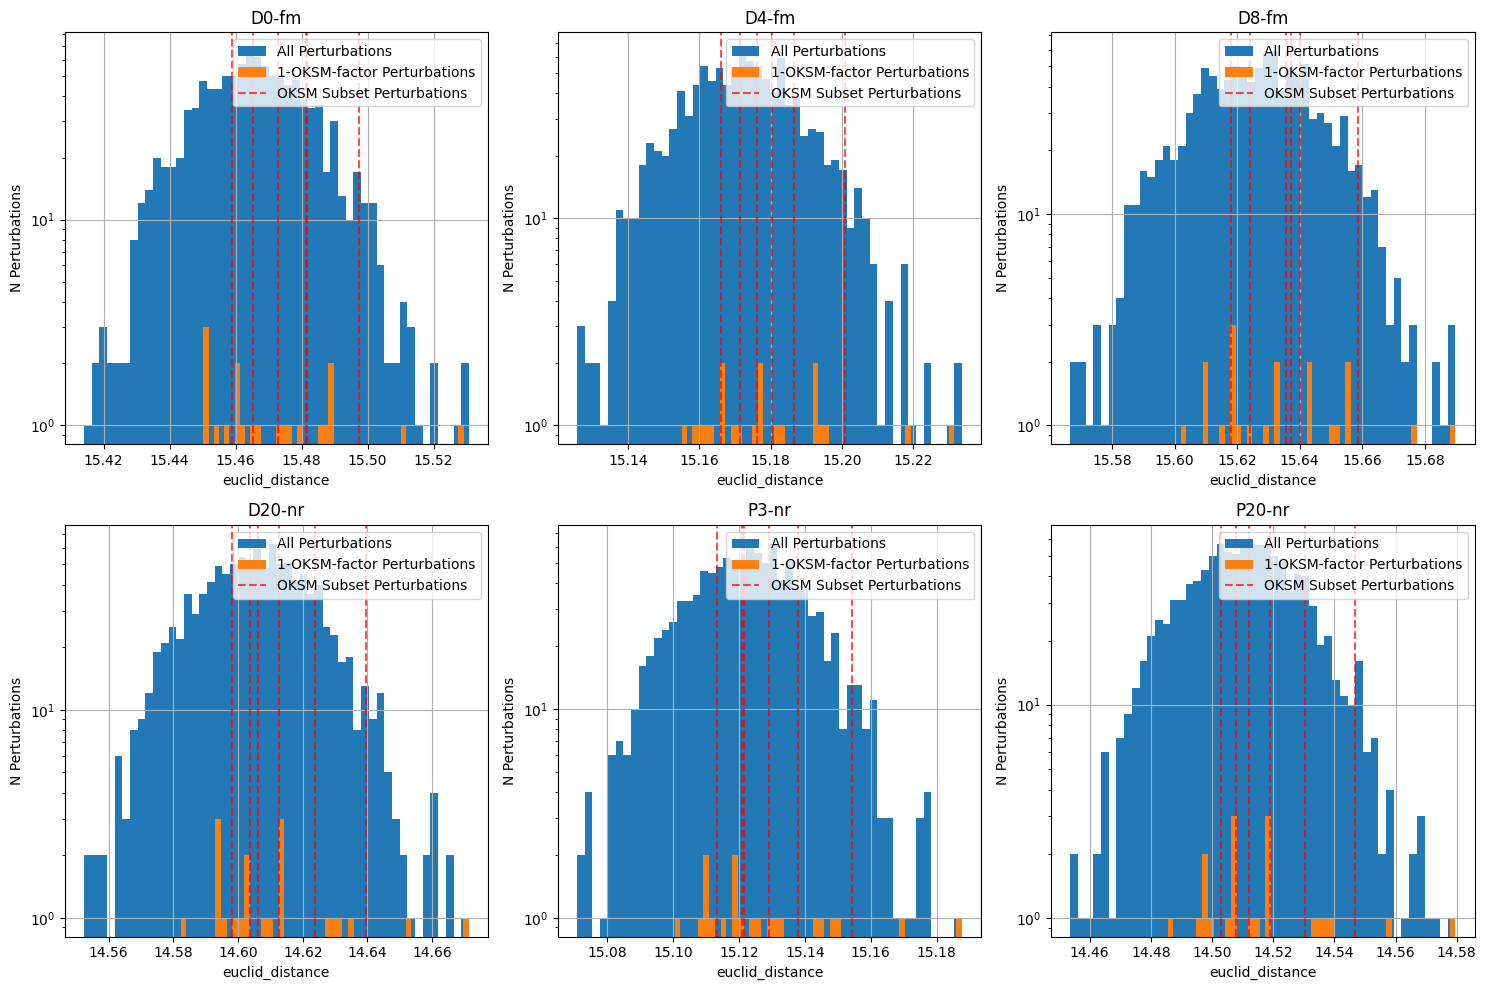

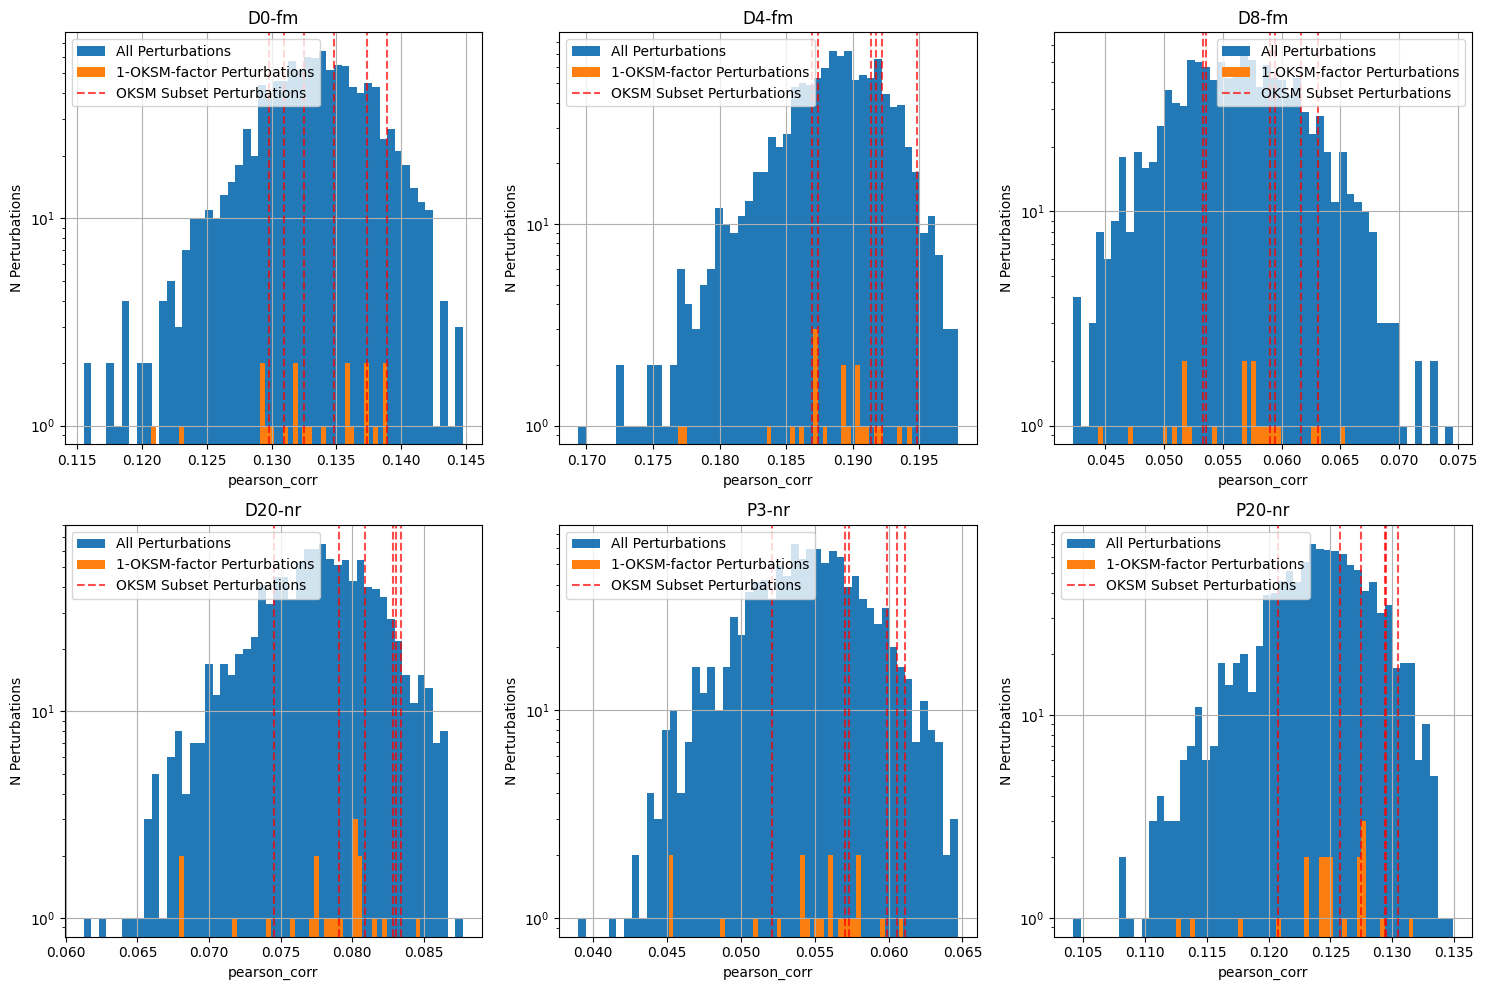

In [7]:
# Parameters
for sim_type in ['euclid_distance', 'pearson_corr']:
    repr_points = ['D0-fm', 'D4-fm', 'D8-fm', 'D20-nr', 'P3-nr', 'P20-nr']
    
    # Create subplots
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows and 3 columns
    axes = axes.flatten()  # Flatten to easily iterate over axes
    
    # Loop over each representation point and plot histogram
    for i, repr_point in enumerate(repr_points):
        ax = axes[i]  # Get the specific subplot axis
        
        # Plot histograms on the specific axis
        df.loc[:, f'{sim_type}_{repr_point}'].hist(bins=50, log=True, ax=ax, alpha=0.99, label='All Perturbations')
        df.loc[oksm_mask, f'{sim_type}_{repr_point}'].hist(bins=50, log=True, ax=ax, alpha=0.99, label='1-OKSM-factor Perturbations')
        #df.loc[oksm_mask, f'{sim_type}_{repr_point}'].hist(bins=50, log=True, ax=ax, alpha=0.99, label='OKSM-containing Perturbations')
    
        # Plot df_oksm as vertical dashed red lines with labels
        label = 'OKSM Subset Perturbations'
        for value in df_oksm[f'{sim_type}_{repr_point}']:
            ax.axvline(value, color='red', linestyle='--', alpha=0.7, label=label)
            label=None
        
        # Set labels and title
        ax.set_xlabel(sim_type)
        ax.set_ylabel('N Perturbations')
        ax.set_title(f'{repr_point}')
        ax.legend()
    
    # Adjust layout for better spacing
    plt.tight_layout()
    plt.savefig(f'./save/pert_ipsc_corr_panel_{sim_type}.png',bbox_inches='tight')
    plt.show()

In [8]:
rep_order = ['pearson_corr_D0-fm', 'pearson_corr_D4-fm', 'pearson_corr_D8-fm', 'pearson_corr_D20-nr','pearson_corr_P3-nr','pearson_corr_P20-nr']
rep_order_eu = ['euclid_distance_D0-fm', 'euclid_distance_D4-fm', 'euclid_distance_D8-fm', 'euclid_distance_D20-nr','euclid_distance_P3-nr','euclid_distance_P20-nr']
#rep_order = ['pearson_corr_D0-fm', 'pearson_corr_D8-fm', 'pearson_corr_D20-nr','pearson_corr_P20-nr']

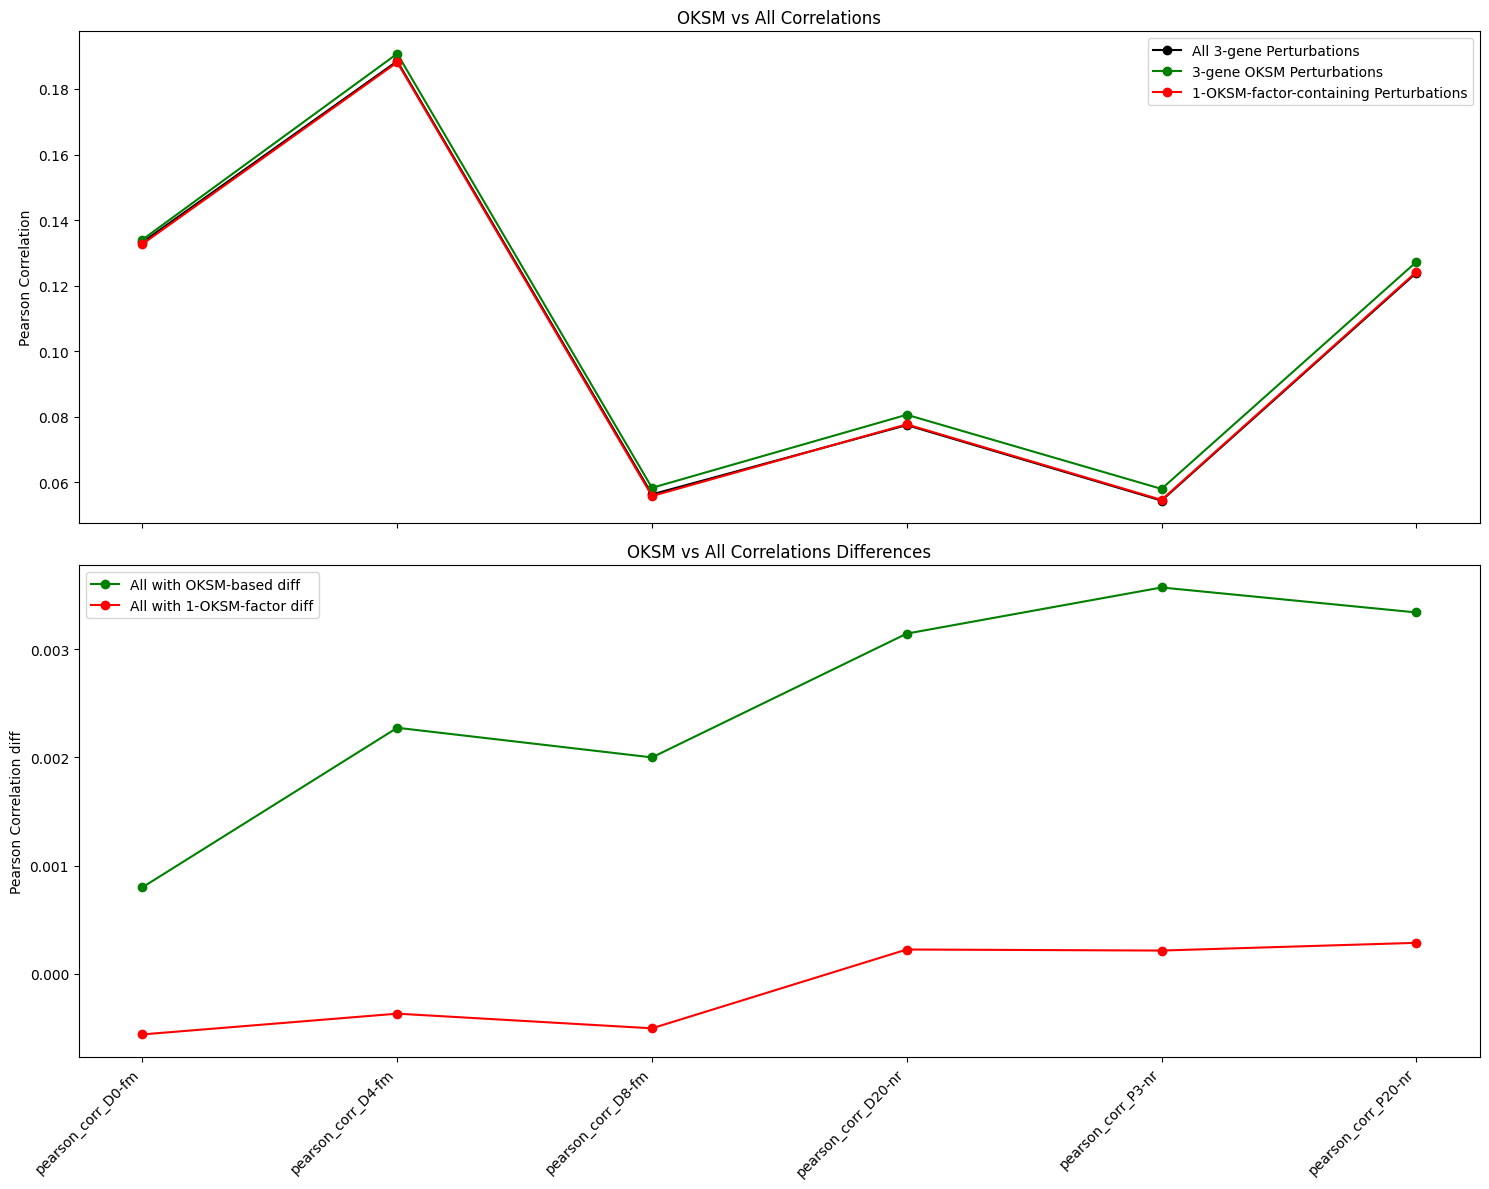

In [9]:
import matplotlib.pyplot as plt

# Create a figure and subplots
fig, axes = plt.subplots(2, 1, figsize=(15, 12), sharex=True)

# Plot the first set of correlations
ax1 = axes[0]
df.loc[:, rep_order].mean().plot(ax=ax1, label='All 3-gene Perturbations', c='black', style='o-')
df_oksm.loc[:, rep_order].mean().plot(ax=ax1, label='3-gene OKSM Perturbations', c='green', style='o-')
df.loc[oksm_mask].loc[:, rep_order].mean().plot(ax=ax1, label='1-OKSM-factor-containing Perturbations', c='red', style='o-')
ax1.set_ylabel('Pearson Correlation')
ax1.legend()
ax1.set_title('OKSM vs All Correlations')

# Plot the second set of correlations differences
ax2 = axes[1]
(df_oksm.loc[:, rep_order].mean() - df.loc[:, rep_order].mean()).plot(ax=ax2, label='All with OKSM-based diff', style='o-',c='green')
(df.loc[oksm_mask, rep_order].mean() - df.loc[:, rep_order].mean()).plot(ax=ax2, label='All with 1-OKSM-factor diff', style='o-',c='red')
ax2.set_xticks(range(len(rep_order)))
ax2.set_xticklabels(rep_order, rotation=45, ha='right')
ax2.set_ylabel('Pearson Correlation diff')
ax2.legend()
ax2.set_title('OKSM vs All Correlations Differences')

# Save the figures as PNG files
plt.savefig(f'./save/orig_perts_OKSM_vs_all_correlation_subplot.png', bbox_inches='tight')

# Show the subplots
plt.tight_layout()
plt.show()


In [16]:
df.sort_values(by='pearson_corr_P20-nr').tail(10).index

Index(['NR1D2_SP140L_KLF5', 'TAB2_ARID5A_KRAS', 'GADD45A_TRIM38_TERF2IP',
       'POLR2J_POLI_EZH1', 'PQBP1_ZHX1_NR2F2', 'KDM5C_LSR_CNOT3',
       'GPATCH8_ZNFX1_ZNF32', 'SP140L_PRKCI_CXXC1', 'PGS1_KLF9_SMAD7',
       'GTF2A1_FOXD1_ATF6'],
      dtype='object')